# Titanic - Machine Learning From Disaster

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

In this section, I will fetch the training and test datasets that are available in the Kaggle's project description in the Data section.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [2]:
### Fetching the train and test datasets

train_dataset = pd.read_csv('../Datasets/train.csv')
test_dataset = pd.read_csv('../Datasets/test.csv')

In [3]:
### Looking at the sample data in the training dataset

train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
### Shape of the training set

train_dataset.shape

(891, 12)

The training dataset consists of 12 columns and 891 rows.

In [5]:
### Looking at the sample data in the test set

test_dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
### Shape of the test dataset

test_dataset.shape

(418, 11)

The test dataset consists of 11 columns and 418 rows.

### 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - Sex, Pclass, Embarked and the numerical columns of the dataset - Age, Fare, Sibsp, Parch.

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [7]:
### Looking at the datatypes of the training and test data

train_dataset.info()
print('-' * 50)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

Here, the columns - Pclass, Name, Ticket, Cabin, and Embarked are categorical. Hence, we modify the datatype of these columns to category.

In [8]:
### Changing the datatype of the columns - Pclass, Name, Ticket, Cabin, Embarked to category in the training data

train_dataset.Pclass = train_dataset.Pclass.astype('category')
train_dataset.Name = train_dataset.Name.astype('category')
train_dataset.Sex = train_dataset.Sex.astype('category')
train_dataset.Ticket = train_dataset.Ticket.astype('category')
train_dataset.Cabin = train_dataset.Cabin.astype('category')
train_dataset.Embarked = train_dataset.Embarked.astype('category')

In [9]:
### Changing the datatype of the columns - Pclass, Name, Sex, Ticket, Cabin, Embarked to category in the test data

test_dataset.Pclass = test_dataset.Pclass.astype('category')
test_dataset.Name = test_dataset.Name.astype('category')
test_dataset.Sex = test_dataset.Sex.astype('category')
test_dataset.Ticket = test_dataset.Ticket.astype('category')
test_dataset.Cabin = test_dataset.Cabin.astype('category')
test_dataset.Embarked = test_dataset.Embarked.astype('category')

Looking at the modified datatypes of the columns in both the training and test datasets.

In [10]:
### Looking at the modified datatypes of the training and test data

train_dataset.info()
print('-' * 50)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(4)
memory usage: 116.1 KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -----------

From the above data, it is evident that there are missing values in the dataset.

In [11]:
### Missing data by columns in the training set

train_dataset.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Here, we can see that there are missing values in the columns - Cabin, Age, Embarked in the training dataset.

In [12]:
### Missing data by columns in the test set

test_dataset.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Here, we can see that there are missing values in the columns - Cabin, Age, Fare in the test dataset.

<AxesSubplot:>

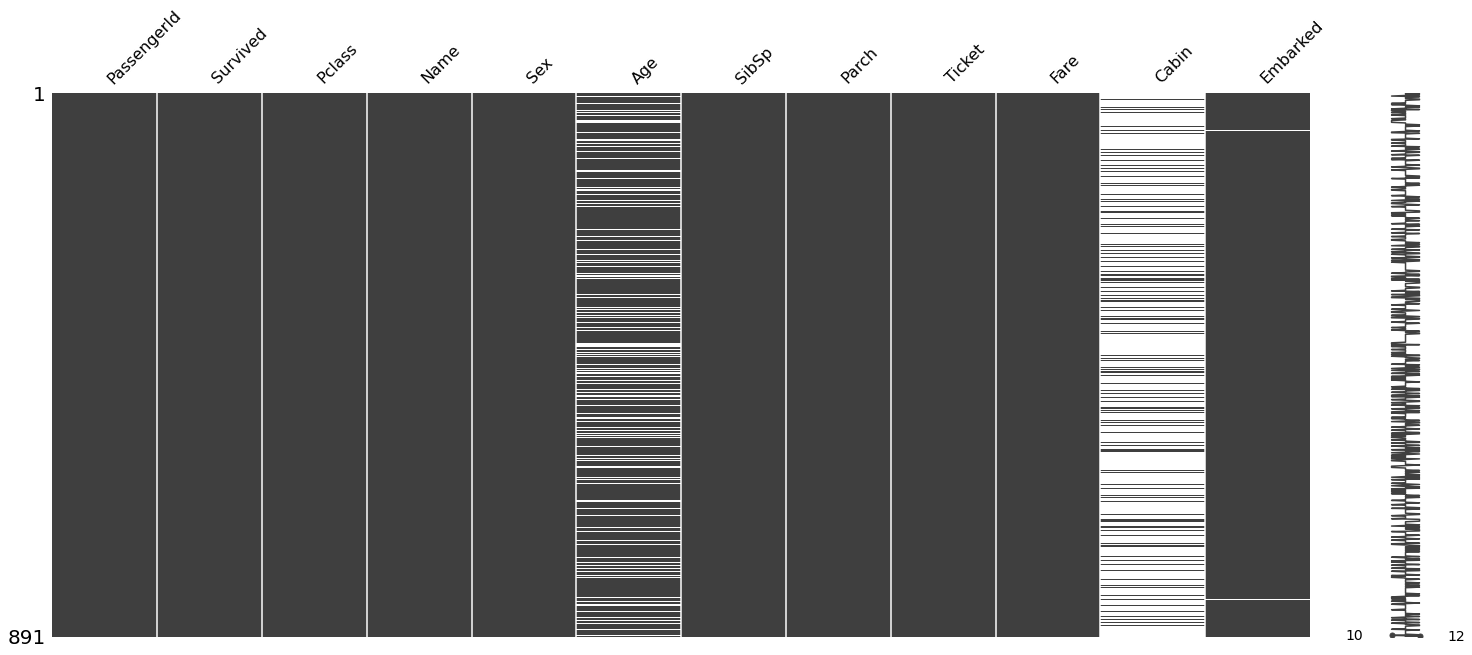

In [13]:
### Visual representation of the missing data in the training set

missingno.matrix(train_dataset)

<AxesSubplot:>

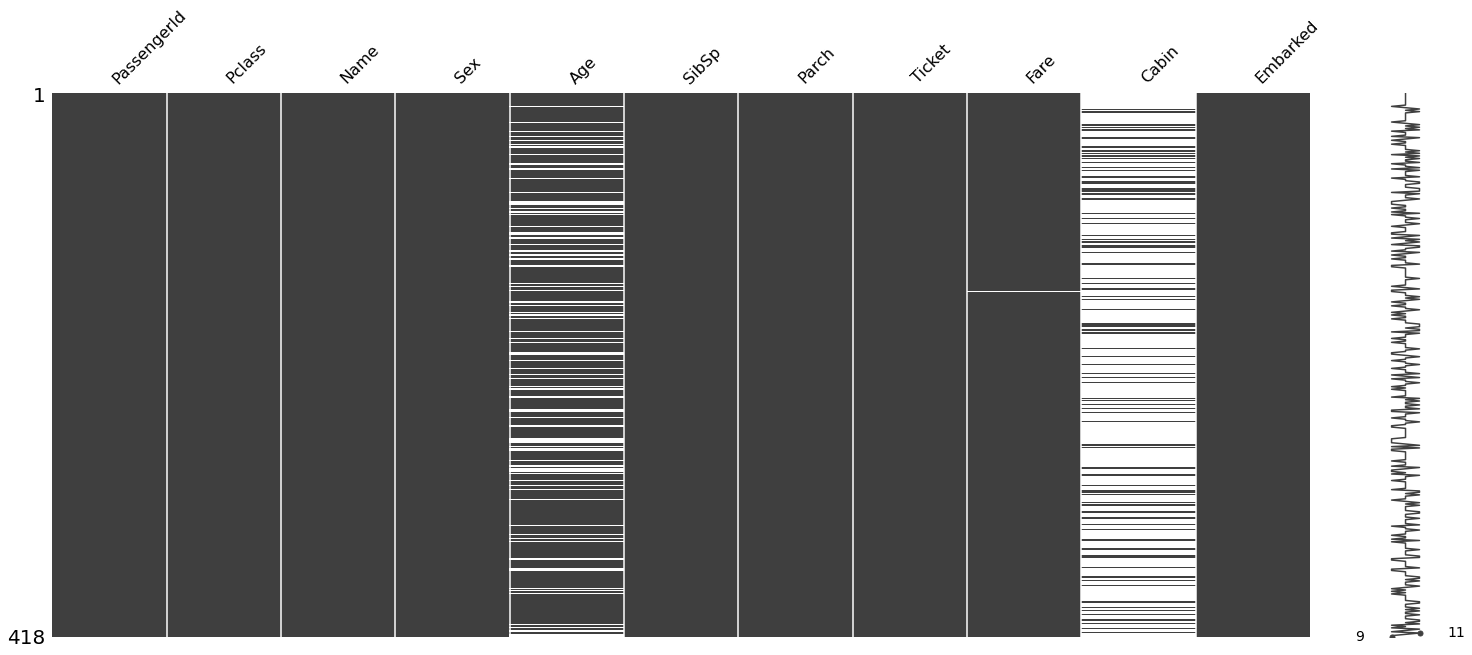

In [14]:
### Visual representation of the missing data in the test set

missingno.matrix(test_dataset)

In [15]:
### Summary statistics of the numerical columns in the training dataset

train_dataset.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
### Summary statistics of the numerical columns in the test dataset

test_dataset.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


#### 3.2 Feature Analysis

##### 3.2.1 Categorical variable - Survived

In [17]:
### Value counts of the column - Survived

survived_count = train_dataset['Survived'].value_counts(dropna = False)
survived_count

0    549
1    342
Name: Survived, dtype: int64

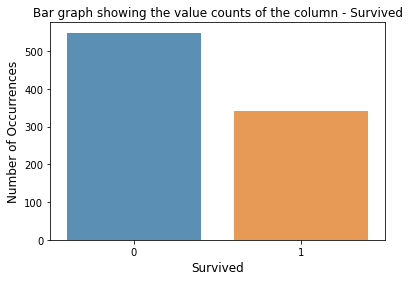

In [18]:
### Bar graph showing the value counts of the column - Survived

sns.barplot(survived_count.index, survived_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Survived')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Survived', fontsize = 12)
plt.show()

From the above graph, we can see that most of the people in the Titanic died during the infamous incident.

##### 3.2.2 Categorical variable - Sex

In [19]:
### Value counts of the column - Sex

sex_count = train_dataset['Sex'].value_counts(dropna = False)
sex_count

male      577
female    314
Name: Sex, dtype: int64

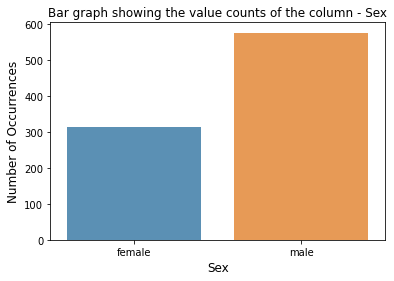

In [20]:
### Bar graph showing the value counts of the column - Sex

sns.barplot(sex_count.index, sex_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Sex')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

From the above graph, we can see that most of the passengers in the Titanic are Male.

In [21]:
### Mean of survival by Sex

sex_survived = train_dataset[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()
sex_survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


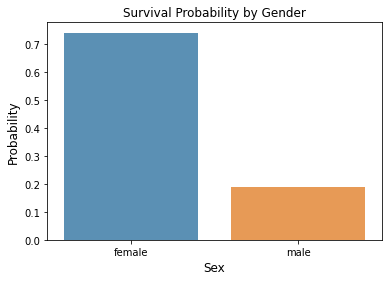

In [22]:
### Survival Probability by Gender

sns.barplot(sex_survived['Sex'], sex_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Gender')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

From the above graph, we can see that the probability of survival is higher in females than males.

##### 3.2.3 Categorical variable - Pclass

In [23]:
### Value counts of the column - Pclass

pclass_count = train_dataset['Pclass'].value_counts(dropna = False)
pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

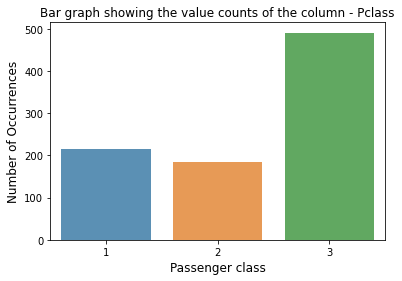

In [24]:
### Bar graph showing the value counts of the column - Pclass

sns.barplot(pclass_count.index, pclass_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Pclass')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Passenger class', fontsize = 12)
plt.show()

From the above graph, we can see that most of the passengers belong to Pclass 3.

In [25]:
### Mean of survival by Pclass

pclass_survived = train_dataset[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()
pclass_survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


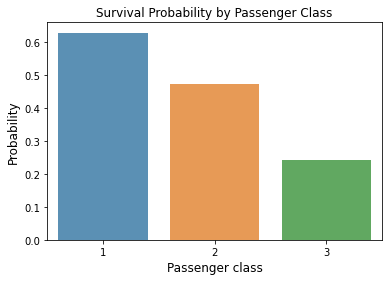

In [26]:
### Survival Probability by Pclass

sns.barplot(pclass_survived['Pclass'], pclass_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Passenger Class')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Passenger class', fontsize = 12)
plt.show()

From the above graph, we can see that the survival rate is higher in the passengers who belong to Pclass 1 than compared to the passengers in Pclass 2 and 3. One reason might be that most of the passengers in Pclass 1 might be female and that's the reason they have a high probability of survival as females have a high probability of survival than compared to male.

Now, let's this hypothesis.

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

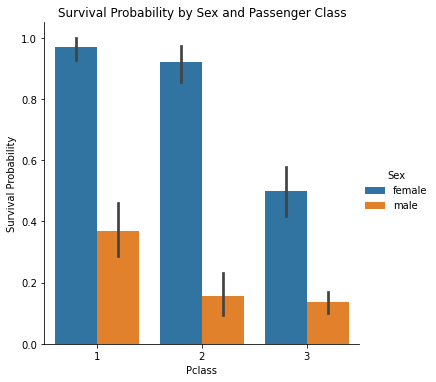

In [27]:
### Survival Probability by Sex and Passenger Class

sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_dataset, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

From the above graph, it is clearly evident that most of the passengers travelling in Pclass 1 are female. Hence, the Pclass 1 passengers have a higher probability of survival than the passengers in Pclass 2 and 3. Hence our hypothesis is verified correctly.

##### 3.2.4 Categorical variable - Embarked

In [28]:
### Value counts of the column - Embarked

embarked_count = train_dataset['Embarked'].value_counts(dropna = False)
embarked_count

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

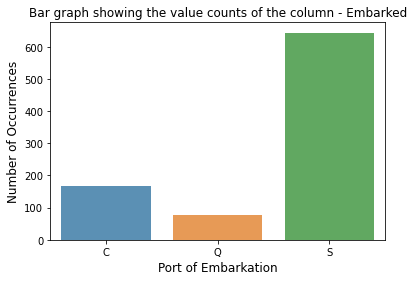

In [29]:
### Bar graph showing the value counts of the column - Embarked

sns.barplot(embarked_count.index, embarked_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Embarked')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Port of Embarkation', fontsize = 12)
plt.show()

From the above graph, we can see that most of the passengers who travelled in Titanic had their Port of Embarkation - S (Southampton).

In [30]:
### Mean of survival by Embarked

embarked_survived = train_dataset[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean()
embarked_survived

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


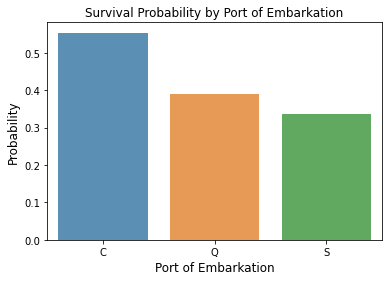

In [31]:
### Survival Probability by Embarked

sns.barplot(embarked_survived['Embarked'], embarked_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Port of Embarkation')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Port of Embarkation', fontsize = 12)
plt.show()

From the above graph, we can see that passengers embarked at Cherbourg have a higher probability of survival than the passengers who embarked at Queenstown and Southampton. This could be because most of the passengers who embarked at Cherbourg might be first class passengers, hence it has a higher probability of survival.

Now let's this hypothesis.

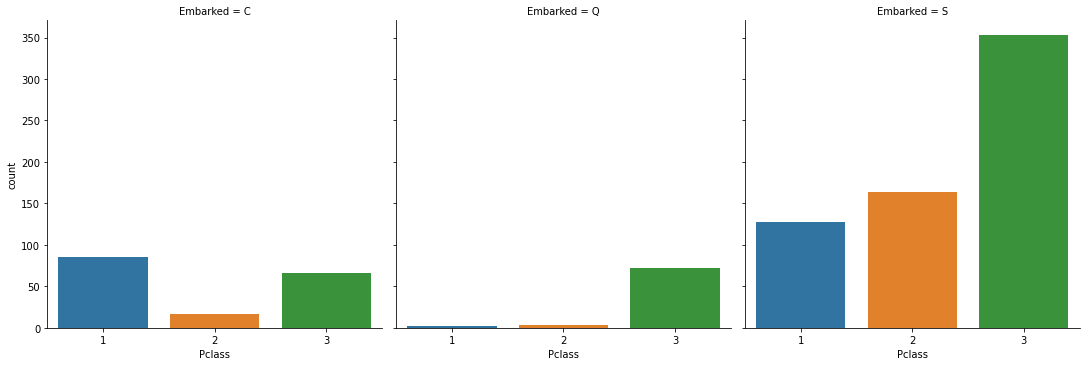

In [32]:
### Distribution of Pclass for each Port of Embarkation

sns.factorplot('Pclass', col = 'Embarked', data = train_dataset, kind = 'count')

From the above graph, we can see that most of the passengers who embarked at Cherbourg belong to Pclass 1, hence they have higher probability of survival. Similarly, for the passengers who embarked at Queenstown and Southampton most of them belong to Pclass 3, hence the lower probability of survival. Hence, our hypothesis is true.

##### 3.2.5 Numerical variable - Age

Text(0.5, 1.0, 'Passenger Age Distribution')

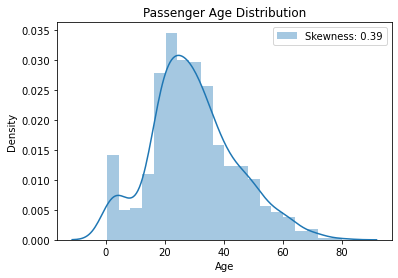

In [33]:
### Understanding the distribution of the column - Age

sns.distplot(train_dataset['Age'], label = 'Skewness: %.2f'%(train_dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

From the above graph, we can see that the distribution is close to normal distribution with a slight skewness.

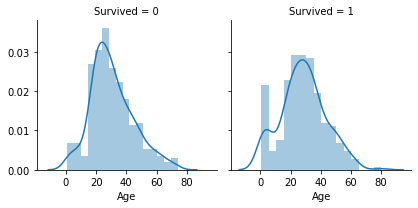

In [34]:
### Age distribution by survival

grid = sns.FacetGrid(train_dataset, col = 'Survived')
grid.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

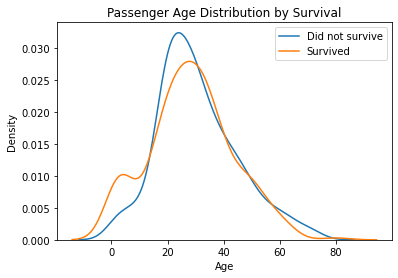

In [35]:
### Merging both the above graphs into one

sns.kdeplot(train_dataset['Age'][train_dataset['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train_dataset['Age'][train_dataset['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.legend()
plt.title('Passenger Age Distribution by Survival')

##### 3.2.6 Numerical variable - Fare

Text(0.5, 1.0, 'Passenger Fare Distribution')

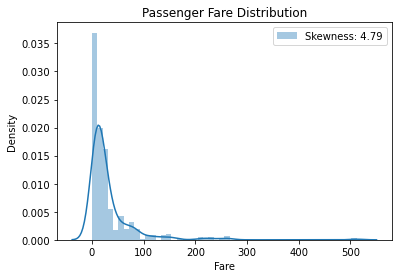

In [36]:
### Understanding the distribution of the column - Fare

sns.distplot(train_dataset['Fare'], label = 'Skewness: %.2f'%(train_dataset['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

From the above graph, we can see that there is a high degree of skewness in the above distribution.

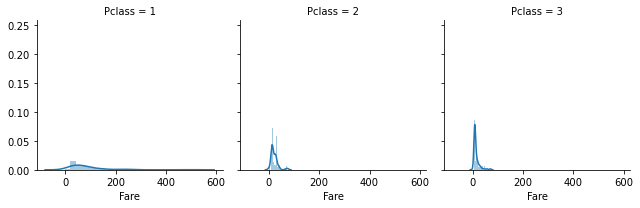

In [37]:
### Fare distribution by Passenger class

grid = sns.FacetGrid(train_dataset, col = 'Pclass')
grid.map(sns.distplot, 'Fare')

From the above graphs, we can see that the distribution of Fare for the passengers in Pclass 1 is wider than compared to the passengers in Pclass 2 and 3. That means, the passengers in Pclass 1 paid a higher fare than compared to the passengers in Pclass 2 and 3.

### 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values
3. Feature engineering
4. Data trasformation
5. Feature encoding

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [38]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_dataset, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


Now let's look at the data present in the rows.

In [39]:
train_dataset.iloc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


We will drop these rows from the training dataset.

In [40]:
### Drop outliers and reset index

print("Before: {} rows".format(len(train_dataset)))
train_dataset = train_dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train_dataset)))

Before: 891 rows
After: 881 rows


In [41]:
### Lets look at the new training dataset

train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 4.2 Drop and fill missing values

Here, we will drop the column - PassengerId from both the training and test sets.

In [42]:
### Dropping the columns - PassengerId from the training dataset

train_dataset.drop(['PassengerId'], axis = 1, inplace = True)
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
### Dropping the columns - PassengerId from the test dataset

test_dataset.drop(['PassengerId'], axis = 1, inplace = True)
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
### Looking at the missing values in the training set

train_dataset.isnull().sum().sort_values(ascending = False)

Cabin       680
Age         170
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In the training dataset, we can see that there are missing values in the columns Cabin, Age, and Embarked. Here, we will focus on replacing the missing values in the columns Age and Embarked. We will take care of the column - Cabin during Feature Engineering.

In [45]:
### Looking at the missing values in the test set

test_dataset.isnull().sum().sort_values(ascending = False)

Cabin       327
Age          86
Fare          1
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Embarked      0
dtype: int64

In the test dataset, we can see that the missing values are in the columns - Cabin, Age and Fare. Here, we will focus on replacing the missing values in the columns Age and Fare. We will take care of the column - Cabin during Feature Engineering.

##### 4.2.1 Handling missing values - Age (training and test sets)

From the distribution of the column Age, we can see that the data is almost normally distributed. Hence, we will use the median value to replace the missing values of the column.

In [46]:
### Finding the median value of the column - Age in the training set

age_index = list(~train_dataset['Age'].isnull())
median_age = np.median(train_dataset['Age'].loc[age_index])
median_age

28.0

In [47]:
### Replacing the missing values of the column - Age in the training dataset

train_dataset['Age'].fillna(median_age, inplace = True)

In [48]:
### Finding the median value of the column - Age in the test dataset

age_index = list(~test_dataset['Age'].isnull())
median_age = np.median(test_dataset['Age'].loc[age_index])
median_age

27.0

In [49]:
### Replacing the missing values of the column - Age in the test dataset

test_dataset['Age'].fillna(median_age, inplace = True)

In [50]:
### Checking if there are any missing values of Age in the training dataset

train_dataset['Age'].isnull().sum()

0

In [51]:
### Checking if there are any missing values of Age in the test dataset

test_dataset['Age'].isnull().sum()

0

##### 4.2.2 Handling missing values - Embarked (training set)

From the analysis on the variable - Embarked, we can use the following decision logic to replace the missing values:

> if (Pclass == 1 and Survived == 1) -> Embarked = C
>
> if (Pclass == 3 and Survived == 1) -> Embarked = Q
>
> else Embarked = S

In [52]:
### Finding the indices of the rows where Embarked is null

index_values = list(train_dataset['Embarked'].isnull())
index_values

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [53]:
### Replacing the missing values in the column Embarked using the decision logic

for index in range(len(train_dataset)):
    if index_values[index]:
        if train_dataset['Pclass'][index] == 1 and train_dataset['Survived'][index] == 1:
            train_dataset['Embarked'][index] = 'C'
        elif train_dataset['Pclass'][index] == 3 and train_dataset['Survived'][index] == 1:
            train_dataset['Embarked'][index] = 'Q'
        else:
            train_dataset['Embarked'][index] = 'S'

In [54]:
### Checking if there are any missing values of Embarked in the training dataset

train_dataset['Embarked'].isnull().sum()

0

##### 4.2.3 Handling missing values - Fare (test set)

To replace, the missing values in the column - Fare, we use the medin fare of the data present in the test dataset.

In [55]:
### Finding the median value of the column - Fare in the test set

fare_index = list(~test_dataset['Fare'].isnull())
median_fare = np.median(test_dataset['Fare'].loc[fare_index])
median_fare

14.4542

In [56]:
### Replacing the missing values of the column - Fare in the test dataset

test_dataset['Fare'].fillna(median_fare, inplace = True)

In [57]:
### Checking if there are any missing values of Fare in the test dataset

test_dataset['Fare'].isnull().sum()

0

In [58]:
### Looking if the training dataset has any more missing values apart from Cabin

train_dataset.isnull().sum().sort_values(ascending = False)

Cabin       680
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [59]:
### Looking if the test dataset has any more missing values apart from Cabin

test_dataset.isnull().sum().sort_values(ascending = False)

Cabin       327
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

Since, there are no missing values in the data apart from the data in the column - Cabin (which we will deal in the Feature Engineering), we can proceed to perform Feature Engineering.

#### 4.3 Feature Engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

Here, we focus on creating new columns for:
1. NewCabin - using the column Cabin
2. Title - using the column Name
3. TotalPassengers - using the columns SibSp, Parch
4. AgeCategory - using the column Age

##### 4.3.1 NewCabin - using the column Cabin

From the training dataset, we can see that there are a lot of missing values in the column - Cabin. Hence, we convert the data in the column to strings i.e., nan -> "nan".

In [60]:
### Converting the data of the column Cabin to strings

cabin_data = [str(cabin) for cabin in train_dataset['Cabin']]

### Fetching the first character of the cabins other nan

modified_cabin_data = [cabin[0] if cabin != 'nan' else cabin for cabin in cabin_data]
set(modified_cabin_data)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'nan'}

In [61]:
### Adding the modified cabin data to NewCabin column of the training dataset

train_dataset['NewCabin'] = modified_cabin_data
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,nan
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,nan
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,nan
877,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
878,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,nan
879,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


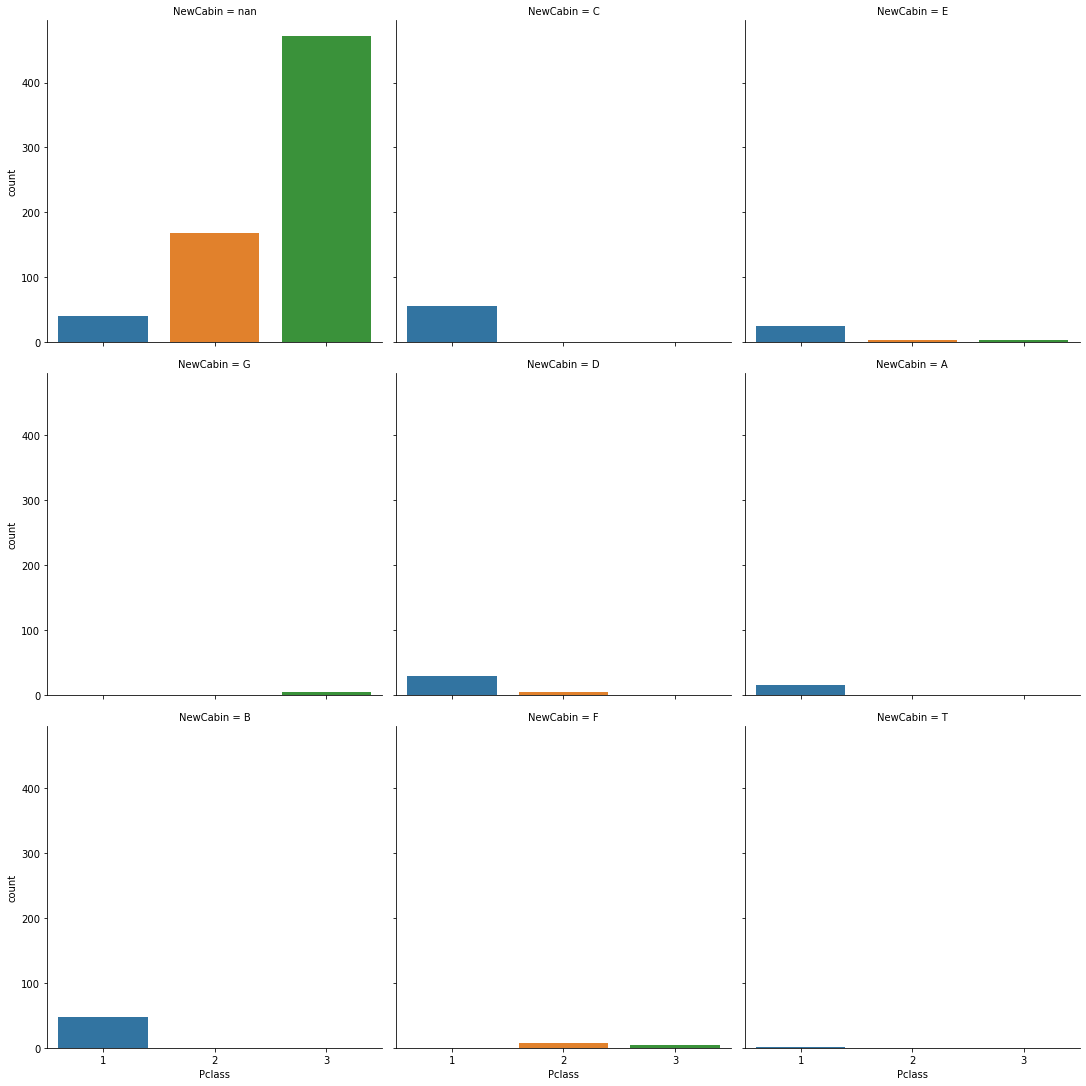

In [62]:
### Distribution of the column Pclass for each New Cabin type

sns.factorplot('Pclass', col = 'NewCabin', data = train_dataset, kind = 'count', col_wrap = 3)

From the above graphs, we can see that most of the passengers travelling in the cabins starting with A, B, C, D, E, T belong to Pclass 1. Similarly, for the cabins starting with F belong to Pclass 2 and the cabins nan (unknown) have most of the passengers travelling in Pclass 3.

In [63]:
### Modifying the data using the above graphs

new_cabin_data = []
for cabin in modified_cabin_data:
    if cabin in {'A', 'B', 'C', 'D', 'E', 'T'}:
        new_cabin_data.append(1)
    elif cabin == 'F':
        new_cabin_data.append(2)
    else:
        new_cabin_data.append(3)
        
new_cabin_data

[3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,


In [64]:
### Adding the above data to the training data

train_dataset['NewCabin'] = new_cabin_data
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
877,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
878,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
879,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Now we add the column - NewCabin to the test dataset using the same steps followed in the above code blocks.

In [65]:
### Converting the data of the column Cabin to strings

cabin_test_data = [str(cabin) for cabin in test_dataset['Cabin']]

### Fetching the first character of the cabins other nan

modified_test_cabin_data = [cabin[0] if cabin != 'nan' else cabin for cabin in cabin_test_data]
set(modified_test_cabin_data)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'nan'}

In [66]:
### Modifying the data using the above graphs

new_cabin_test_data = []
for cabin in modified_test_cabin_data:
    if cabin in {'A', 'B', 'C', 'D', 'E', 'T'}:
        new_cabin_test_data.append(1)
    elif cabin == 'F':
        new_cabin_test_data.append(2)
    else:
        new_cabin_test_data.append(3)
        
new_cabin_test_data

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,


In [67]:
### Adding the above data to the test data

test_dataset['NewCabin'] = new_cabin_test_data
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,3
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,3
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,3


Since, we now added the column - NewCabin to both the datasets, we can remove the original column - Cabin from the datasets.

In [68]:
### Dropping the column - NewCabin from the training dataset

train_dataset.drop(['Cabin'], axis = 1, inplace = True)
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3
...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,3
877,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
878,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3
879,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [69]:
### Dropping the column - NewCabin from the test dataset

test_dataset.drop(['Cabin'], axis = 1, inplace = True)
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,3
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,3
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,3


##### 4.3.2 Title - using the column Name

In [70]:
### Fetching the title from the name of a passenger

name_data = train_dataset['Name']
titles = []
for name in name_data:
    name_split = name.split(',')[1]
    title = name_split[1 : name_split.index('.')]
    titles.append(title)
    
### Looking at the unique titles

set(titles)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

Now we will categorize these titles to Special and Regular (Mr, Master, Miss, Mrs, Ms) and will be coded such that Special means 1 and Regular means 0, as if there is any other value to Regular it simply correlates with the column - Sex.

In [71]:
### Categorize titles to 2 categories - Special (1) and Regular (0)

title_data = []
for title in titles:
    if title in {'Mr', 'Master', 'Mrs', 'Miss', 'Ms'}:
        title_data.append(0)
    else:
        title_data.append(1)
        
### Adding the title to the dataset

train_dataset['Title'] = title_data
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,3,1
877,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0
878,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,0
879,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0


In [72]:
### Mean of survival by Title

title_survived = train_dataset[['Title', 'Survived']].groupby('Title', as_index = False).mean()
title_survived

,Title,Survived
0,0,0.384795
1,1,0.423077


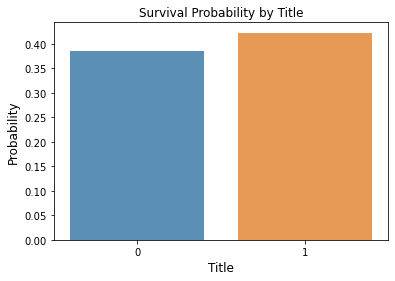

In [73]:
### Survival Probability by Title

sns.barplot(title_survived['Title'], title_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Title')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Title', fontsize = 12)
plt.show()

From the above graph, we can see that probability of survival in Female_Regular is higher than Male_Regular and Special. Now we add the column - Title to the test dataset using the same steps followed in the above code blocks.

In [74]:
### Fetching the title from the name of a passenger

name_test_data = test_dataset['Name']
titles = []
for name in name_test_data:
    name_split = name.split(',')[1]
    title = name_split[1 : name_split.index('.')]
    titles.append(title)
    
### Looking at the unique titles

set(titles)

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

In [75]:
### Categorize titles to 2 categories - Special (1) and Regular (0)

title_data = []
for title in titles:
    if title in {'Mr', 'Master', 'Mrs', 'Miss', 'Ms'}:
        title_data.append(0)
    else:
        title_data.append(1)
        
### Adding the title to the dataset

test_dataset['Title'] = title_data
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,3,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,3,0
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,3,0


Since, we now added the column - Title to both the datasets, we will now remove the parent column - Name from both the training and test datasets.

In [76]:
### Dropping the column - Name from the training dataset

train_dataset.drop(['Name'], axis = 1, inplace = True)
train_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,3,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0
3,1,1,female,35.0,1,0,113803,53.1000,S,1,0
4,0,3,male,35.0,0,0,373450,8.0500,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,27.0,0,0,211536,13.0000,S,3,1
877,1,1,female,19.0,0,0,112053,30.0000,S,1,0
878,0,3,female,28.0,1,2,W./C. 6607,23.4500,S,3,0
879,1,1,male,26.0,0,0,111369,30.0000,C,1,0


In [77]:
### Dropping the column - Name from the test dataset

test_dataset.drop(['Name'], axis = 1, inplace = True)
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title
0,3,male,34.5,0,0,330911,7.8292,Q,3,0
1,3,female,47.0,1,0,363272,7.0000,S,3,0
2,2,male,62.0,0,0,240276,9.6875,Q,3,0
3,3,male,27.0,0,0,315154,8.6625,S,3,0
4,3,female,22.0,1,1,3101298,12.2875,S,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,A.5. 3236,8.0500,S,3,0
414,1,female,39.0,0,0,PC 17758,108.9000,C,1,1
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,3,0
416,3,male,27.0,0,0,359309,8.0500,S,3,0


##### 4.3.3 TotalPassengers - using the columns SibSp, Parch

In [78]:
### Adding the total passengers using SibSp + Parch + 1

train_dataset['TotalPassengers'] = train_dataset['SibSp'] + train_dataset['Parch'] + 1
train_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,3,0,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,1,0,2
4,0,3,male,35.0,0,0,373450,8.0500,S,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,27.0,0,0,211536,13.0000,S,3,1,1
877,1,1,female,19.0,0,0,112053,30.0000,S,1,0,1
878,0,3,female,28.0,1,2,W./C. 6607,23.4500,S,3,0,4
879,1,1,male,26.0,0,0,111369,30.0000,C,1,0,1


In [79]:
### Mean of survival by TotalPassengers

total_passengers_survived = train_dataset[['TotalPassengers', 'Survived']].groupby('TotalPassengers', as_index = False).mean()
total_passengers_survived

,TotalPassengers,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.052632
6,7,0.333333
7,8,0.000000


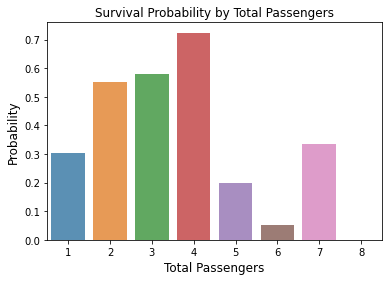

In [80]:
### Survival Probability by TotalPassengers

sns.barplot(total_passengers_survived['TotalPassengers'], total_passengers_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Total Passengers')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Total Passengers', fontsize = 12)
plt.show()

From the above graph, we can say that probability of survival is high in the case where Total Passengers travelling are either 2, 3, or 4. Now we add the column - TotalPassengers to the test dataset using the same steps followed in the above code blocks.

In [81]:
### Adding the total passengers using SibSp + Parch + 1 to the test dataset

test_dataset['TotalPassengers'] = test_dataset['SibSp'] + test_dataset['Parch'] + 1
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers
0,3,male,34.5,0,0,330911,7.8292,Q,3,0,1
1,3,female,47.0,1,0,363272,7.0000,S,3,0,2
2,2,male,62.0,0,0,240276,9.6875,Q,3,0,1
3,3,male,27.0,0,0,315154,8.6625,S,3,0,1
4,3,female,22.0,1,1,3101298,12.2875,S,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,A.5. 3236,8.0500,S,3,0,1
414,1,female,39.0,0,0,PC 17758,108.9000,C,1,1,1
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,3,0,1
416,3,male,27.0,0,0,359309,8.0500,S,3,0,1


Since, we now added the column - TotalPassengers to both the datasets, we will now remove the parent columns - SibSp and Parch from both the training and test datasets.

In [82]:
### Dropping the columns - SibSp, Parch from the training dataset

train_dataset.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
train_dataset

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers
0,0,3,male,22.0,A/5 21171,7.2500,S,3,0,2
1,1,1,female,38.0,PC 17599,71.2833,C,1,0,2
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,3,0,1
3,1,1,female,35.0,113803,53.1000,S,1,0,2
4,0,3,male,35.0,373450,8.0500,S,3,0,1
...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,27.0,211536,13.0000,S,3,1,1
877,1,1,female,19.0,112053,30.0000,S,1,0,1
878,0,3,female,28.0,W./C. 6607,23.4500,S,3,0,4
879,1,1,male,26.0,111369,30.0000,C,1,0,1


In [83]:
### Dropping the columns - SibSp, Parch from the test dataset

test_dataset.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test_dataset

,Pclass,Sex,Age,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers
0,3,male,34.5,330911,7.8292,Q,3,0,1
1,3,female,47.0,363272,7.0000,S,3,0,2
2,2,male,62.0,240276,9.6875,Q,3,0,1
3,3,male,27.0,315154,8.6625,S,3,0,1
4,3,female,22.0,3101298,12.2875,S,3,0,3
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,A.5. 3236,8.0500,S,3,0,1
414,1,female,39.0,PC 17758,108.9000,C,1,1,1
415,3,male,38.5,SOTON/O.Q. 3101262,7.2500,S,3,0,1
416,3,male,27.0,359309,8.0500,S,3,0,1


##### 4.3.4 AgeCategory - using the column Age

It was rumored that during the Titanic evacuation Females and Kids were given the first priority. We already know that half of the above statement is true as Females have a higher probability of survival. Now, we will verify the second part of the statement is a tautology or not. 

Here, we will keep an age threshold of 18 such that if the age of a passenger is less than 18 that passenger is young or else an adult. 

In [84]:
### Creating age slabs for the training data

age_data = train_dataset['Age']
slabs = []
for age in age_data:
    if age < 18:
        slabs.append('young')
    else:
        slabs.append('adult')

### Adding the age slabs to the training dataset

train_dataset['AgeSlab'] = slabs
train_dataset

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,0,3,male,22.0,A/5 21171,7.2500,S,3,0,2,adult
1,1,1,female,38.0,PC 17599,71.2833,C,1,0,2,adult
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,3,0,1,adult
3,1,1,female,35.0,113803,53.1000,S,1,0,2,adult
4,0,3,male,35.0,373450,8.0500,S,3,0,1,adult
...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,27.0,211536,13.0000,S,3,1,1,adult
877,1,1,female,19.0,112053,30.0000,S,1,0,1,adult
878,0,3,female,28.0,W./C. 6607,23.4500,S,3,0,4,adult
879,1,1,male,26.0,111369,30.0000,C,1,0,1,adult


In [85]:
### Mean of survival by AgeSlab

age_slab_survived = train_dataset[['AgeSlab', 'Survived']].groupby('AgeSlab', as_index = False).mean()
age_slab_survived

,AgeSlab,Survived
0,adult,0.363281
1,young,0.539823


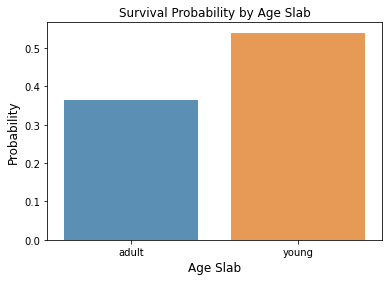

In [86]:
### Survival Probability by AgeSlab

sns.barplot(age_slab_survived['AgeSlab'], age_slab_survived['Survived'], alpha = 0.8)
plt.title('Survival Probability by Age Slab')
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Age Slab', fontsize = 12)
plt.show()

From the above graph, we can say that probability of survival is higher in younger passengers than compared to adult passengers. Now we will add the AgeSlab column to the test dataset using the above code cells.

In [87]:
### Creating age slabs for the test data

age_data = test_dataset['Age']
slabs = []
for age in age_data:
    if age < 18:
        slabs.append('young')
    else:
        slabs.append('adult')

### Adding the age slabs to the test dataset

test_dataset['AgeSlab'] = slabs
test_dataset

,Pclass,Sex,Age,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,3,male,34.5,330911,7.8292,Q,3,0,1,adult
1,3,female,47.0,363272,7.0000,S,3,0,2,adult
2,2,male,62.0,240276,9.6875,Q,3,0,1,adult
3,3,male,27.0,315154,8.6625,S,3,0,1,adult
4,3,female,22.0,3101298,12.2875,S,3,0,3,adult
...,...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,A.5. 3236,8.0500,S,3,0,1,adult
414,1,female,39.0,PC 17758,108.9000,C,1,1,1,adult
415,3,male,38.5,SOTON/O.Q. 3101262,7.2500,S,3,0,1,adult
416,3,male,27.0,359309,8.0500,S,3,0,1,adult


Since, we added the column - AgeSlab in both the datasets, we will now remove the parent column - Age from both the training and test datasets.

In [88]:
### Dropping the column - Age from the training dataset

train_dataset.drop(['Age'], axis = 1, inplace = True)
train_dataset

,Survived,Pclass,Sex,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,0,3,male,A/5 21171,7.2500,S,3,0,2,adult
1,1,1,female,PC 17599,71.2833,C,1,0,2,adult
2,1,3,female,STON/O2. 3101282,7.9250,S,3,0,1,adult
3,1,1,female,113803,53.1000,S,1,0,2,adult
4,0,3,male,373450,8.0500,S,3,0,1,adult
...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,211536,13.0000,S,3,1,1,adult
877,1,1,female,112053,30.0000,S,1,0,1,adult
878,0,3,female,W./C. 6607,23.4500,S,3,0,4,adult
879,1,1,male,111369,30.0000,C,1,0,1,adult


In [89]:
### Dropping the column - Age from the test dataset

test_dataset.drop(['Age'], axis = 1, inplace = True)
test_dataset

,Pclass,Sex,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,3,male,330911,7.8292,Q,3,0,1,adult
1,3,female,363272,7.0000,S,3,0,2,adult
2,2,male,240276,9.6875,Q,3,0,1,adult
3,3,male,315154,8.6625,S,3,0,1,adult
4,3,female,3101298,12.2875,S,3,0,3,adult
...,...,...,...,...,...,...,...,...,...
413,3,male,A.5. 3236,8.0500,S,3,0,1,adult
414,1,female,PC 17758,108.9000,C,1,1,1,adult
415,3,male,SOTON/O.Q. 3101262,7.2500,S,3,0,1,adult
416,3,male,359309,8.0500,S,3,0,1,adult


Now let's look at the correlation between the numerical values of the training dataset. 

Text(0.5, 1.0, 'Correlation Heatmap')

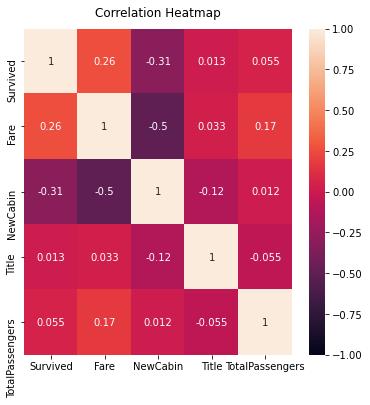

In [90]:
### Plotting the correlation between various columns of the training set

plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(train_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

From the above matrix, we can see that the columns - NewCabin and Fare have a negative correlation between them.

#### 4.4 Data Transformation

In this section, we will remove the high positive degree of skewness present in the column - Fare by using a log transform on the data.

Text(0.5, 1.0, 'Passenger Fare Distribution')

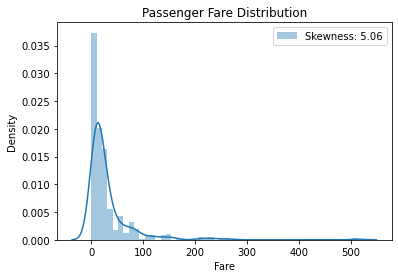

In [91]:
### Understanding the distribution of the column - Fare

sns.distplot(train_dataset['Fare'], label = 'Skewness: %.2f'%(train_dataset['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

Text(0.5, 1.0, 'Passenger Fare Distribution')

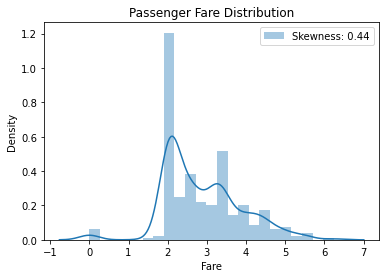

In [92]:
### Understanding the distribution of the data log(Fare)

modified_fare = [np.log(fare) if fare > 0 else fare for fare in train_dataset['Fare']]
train_dataset['Fare'] = modified_fare

sns.distplot(train_dataset['Fare'], label = 'Skewness: %.2f'%(train_dataset['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data. Similarly, we transform the data present in the column Fare of the test data.

In [93]:
### Modifying the column - Fare in the test data

modified_fare = [np.log(fare) if fare > 0 else fare for fare in test_dataset['Fare']]
test_dataset['Fare'] = modified_fare

#### 4.5 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

First we will encode the column Ticket such that if the Ticket value starts with a number it belongs to class 1, else class 2.

In [94]:
### Encoding the column - Ticket

ticket_data = train_dataset['Ticket']
new_ticket_data = []

for ticket in ticket_data:
    if ticket[0].isdigit():
        new_ticket_data.append(1)
    else:
        new_ticket_data.append(2)
        
new_ticket_data

[2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,


In [95]:
### Replacing the column - Ticket with the new data

train_dataset['Ticket'] = new_ticket_data
train_dataset

,Survived,Pclass,Sex,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,0,3,male,2,1.981001,S,3,0,2,adult
1,1,1,female,2,4.266662,C,1,0,2,adult
2,1,3,female,2,2.070022,S,3,0,1,adult
3,1,1,female,1,3.972177,S,1,0,2,adult
4,0,3,male,1,2.085672,S,3,0,1,adult
...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,1,2.564949,S,3,1,1,adult
877,1,1,female,1,3.401197,S,1,0,1,adult
878,0,3,female,2,3.154870,S,3,0,4,adult
879,1,1,male,1,3.401197,C,1,0,1,adult


Now, we will modify the Ticket column in the test dataset using the same steps as done above.

In [96]:
### Encoding the column - Ticket

ticket_data = test_dataset['Ticket']
new_ticket_data = []

for ticket in ticket_data:
    if ticket[0].isdigit():
        new_ticket_data.append(1)
    else:
        new_ticket_data.append(2)
        
new_ticket_data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,


In [97]:
### Replacing the column - Ticket with the new data

test_dataset['Ticket'] = new_ticket_data
test_dataset

,Pclass,Sex,Ticket,Fare,Embarked,NewCabin,Title,TotalPassengers,AgeSlab
0,3,male,1,2.057860,Q,3,0,1,adult
1,3,female,1,1.945910,S,3,0,2,adult
2,2,male,1,2.270836,Q,3,0,1,adult
3,3,male,1,2.159003,S,3,0,1,adult
4,3,female,1,2.508582,S,3,0,3,adult
...,...,...,...,...,...,...,...,...,...
413,3,male,2,2.085672,S,3,0,1,adult
414,1,female,2,4.690430,C,1,1,1,adult
415,3,male,2,1.981001,S,3,0,1,adult
416,3,male,1,2.085672,S,3,0,1,adult


Now we perform One Hot Encoding on the columns - Pclass, Sex, Ticket, Embarked, NewCabin, AgeSlab for both the Training and Test datasets.

In [98]:
### One Hot Encoding the columns - Pclass, Sex, Embarked, NewCabin, AgeSlab of the training set

encoded_train_dataset = pd.get_dummies(data = train_dataset, 
                                       columns = ['Pclass', 'Sex', 'Embarked', 'NewCabin', 'AgeSlab'])
encoded_train_dataset

,Survived,Ticket,Fare,Title,TotalPassengers,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NewCabin_1,NewCabin_2,NewCabin_3,AgeSlab_adult,AgeSlab_young
0,0,2,1.981001,0,2,0,0,1,0,1,0,0,1,0,0,1,1,0
1,1,2,4.266662,0,2,1,0,0,1,0,1,0,0,1,0,0,1,0
2,1,2,2.070022,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,1,1,3.972177,0,2,1,0,0,1,0,0,0,1,1,0,0,1,0
4,0,1,2.085672,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,1,2.564949,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0
877,1,1,3.401197,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
878,0,2,3.154870,0,4,0,0,1,1,0,0,0,1,0,0,1,1,0
879,1,1,3.401197,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0


In [99]:
### One Hot Encoding the columns - Pclass, Sex, Embarked, NewCabin, AgeSlab of the test set

encoded_test_dataset = pd.get_dummies(data = test_dataset, 
                                       columns = ['Pclass', 'Sex', 'Embarked', 'NewCabin', 'AgeSlab'])
encoded_test_dataset

,Ticket,Fare,Title,TotalPassengers,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NewCabin_1,NewCabin_2,NewCabin_3,AgeSlab_adult,AgeSlab_young
0,1,2.057860,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
1,1,1.945910,0,2,0,0,1,1,0,0,0,1,0,0,1,1,0
2,1,2.270836,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0
3,1,2.159003,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
4,1,2.508582,0,3,0,0,1,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,2.085672,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
414,2,4.690430,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0
415,2,1.981001,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
416,1,2.085672,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0


Now our datasets are ready for modelling.

### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

1. Logistic regression
2. Support vector classification
3. K-nearest neighbours
4. Naive Bayes
5. Decision tree
6. Random forest

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

#### 5.1 Splitting the Training data 

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [100]:
### Splitting the data to the matrices X and Y using the training set.

X = encoded_train_dataset.iloc[:, 1:].values
Y = encoded_train_dataset.iloc[:, 0].values

In [101]:
### Looking at the new training data - X

X

array([[2.        , 1.98100147, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [2.        , 4.26666208, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [2.        , 2.07002232, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [2.        , 3.15487049, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 3.40119738, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 2.04769284, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [102]:
### Looking at the new test data - Y

Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [103]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [104]:
X_train

array([[1.        , 3.94117784, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [2.        , 1.95302762, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 3.4339872 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 4.48980647, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 2.0466213 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.97754723, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [105]:
X_test

array([[1.        , 4.38202663, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [2.        , 2.81540872, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 2.41963008, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 2.34779744, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 4.19870458, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 2.04769284, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [106]:
Y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [107]:
Y_test

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0], dtype=int64)

Now, we convert the original test dataset to a numpy array.

In [108]:
### Converting the original test dataset to a numpy array

real_test_data = encoded_test_dataset.iloc[:, :].values
real_test_data

array([[1.        , 2.05786033, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.94591015, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 2.27083639, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [2.        , 1.98100147, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 2.08567209, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 3.10719762, 0.        , ..., 1.        , 1.        ,
        0.        ]])

#### 5.2 Fit Model

In this section, we use various machine learning models to predict the results for our sample test data (X_test). Based on the performance of each model, we select one best model to predict the results on the original test data (real_test_data). We will store the model and its accuracy so that we can tabulate them later for choosing the best model.

In [109]:
### Dictionary to store model and its accuracy

model_performance = OrderedDict()

##### 5.2.1 Applying Logistic Regression

In [110]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [111]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [112]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Logistic Regression'] = logistic_accuracy

print('The accuracy of this model is {} %.'.format(logistic_accuracy))

[[101  10]
 [ 19  47]]
The accuracy of this model is 83.62 %.


##### 5.2.2 Applying Support Vector Classification - Linear

In [113]:
### Applying Linear SVM Classification model

linear_svm_classifier = SVC(kernel = 'linear', random_state = 27)
linear_svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=27)

In [114]:
### Predicting the Test set results

Y_pred = linear_svm_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [115]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

linear_svc_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Linear SVC'] = linear_svc_accuracy
print('The accuracy of this model is {} %.'.format(linear_svc_accuracy))

[[99 12]
 [21 45]]
The accuracy of this model is 81.36 %.


##### 5.2.3 Applying Support Vector Classification - Kernel

In [116]:
### Applying Kernel SVM Classification model

kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 27)
kernel_svm_classifier.fit(X_train, Y_train)

SVC(random_state=27)

In [117]:
### Predicting the Test set results

Y_pred = kernel_svm_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [118]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

kernel_svc_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Kernel SVC'] = kernel_svc_accuracy
print('The accuracy of this model is {} %.'.format(kernel_svc_accuracy))

[[102   9]
 [ 20  46]]
The accuracy of this model is 83.62 %.


##### 5.2.4 Applying K-Nearest Neighbors (1-NN)

In [119]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [120]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [121]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['1 Nearest Neighbors'] = nn1_accuracy
print('The accuracy of this model is {} %.'.format(nn1_accuracy))

[[91 20]
 [22 44]]
The accuracy of this model is 76.27 %.


##### 5.2.5 Applying K-Nearest Neighbors (3-NN)

In [122]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]

In [124]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['3 Nearest Neighbors'] = nn3_accuracy
print('The accuracy of this model is {} %.'.format(nn3_accuracy))

[[96 15]
 [20 46]]
The accuracy of this model is 80.23 %.


##### 5.2.6 Applying K-Nearest Neighbors (5-NN)

In [125]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [126]:
### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [127]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['5 Nearest Neighbors'] = nn5_accuracy
print('The accuracy of this model is {} %.'.format(nn5_accuracy))

[[96 15]
 [20 46]]
The accuracy of this model is 80.23 %.


##### 5.2.7 Applying K-Nearest Neighbors (7-NN)

In [128]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [129]:
### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [130]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['7 Nearest Neighbors'] = nn7_accuracy
print('The accuracy of this model is {} %.'.format(nn7_accuracy))

[[103   8]
 [ 20  46]]
The accuracy of this model is 84.18 %.


##### 5.2.7 Applying K-Nearest Neighbors (9-NN)

In [131]:
### Applying 9NN model

classifier_9nn = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_9nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [132]:
### Predicting the Test set results

Y_pred = classifier_9nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [133]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn9_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['9 Nearest Neighbors'] = nn9_accuracy
print('The accuracy of this model is {} %.'.format(nn9_accuracy))

[[101  10]
 [ 22  44]]
The accuracy of this model is 81.92 %.


##### 5.2.8 Applying K-Nearest Neighbors (11-NN)

In [134]:
### Applying 11NN model

classifier_11nn = KNeighborsClassifier(n_neighbors = 11, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_11nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [135]:
### Predicting the Test set results

Y_pred = classifier_11nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [136]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn11_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['11 Nearest Neighbors'] = nn11_accuracy
print('The accuracy of this model is {} %.'.format(nn11_accuracy))

[[102   9]
 [ 23  43]]
The accuracy of this model is 81.92 %.


##### 5.2.8 Applying K-Nearest Neighbors (13-NN)

In [137]:
### Applying 13NN model

classifier_13nn = KNeighborsClassifier(n_neighbors = 13, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_13nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

In [138]:
### Predicting the Test set results

Y_pred = classifier_13nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [139]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn13_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['13 Nearest Neighbors'] = nn13_accuracy
print('The accuracy of this model is {} %.'.format(nn13_accuracy))

[[100  11]
 [ 25  41]]
The accuracy of this model is 79.66 %.


##### 5.2.9 Applying K-Nearest Neighbors (15-NN)

In [140]:
### Applying 15NN model

classifier_15nn = KNeighborsClassifier(n_neighbors = 15, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_15nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [141]:
### Predicting the Test set results

Y_pred = classifier_15nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [142]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn15_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['15 Nearest Neighbors'] = nn15_accuracy
print('The accuracy of this model is {} %.'.format(nn15_accuracy))

[[100  11]
 [ 26  40]]
The accuracy of this model is 79.1 %.


##### 5.2.10 Applying K-Nearest Neighbors (17-NN)

In [143]:
### Applying 17NN model

classifier_17nn = KNeighborsClassifier(n_neighbors = 17, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_17nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [144]:
### Predicting the Test set results

Y_pred = classifier_17nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [145]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn17_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['17 Nearest Neighbors'] = nn17_accuracy
print('The accuracy of this model is {} %.'.format(nn17_accuracy))

[[101  10]
 [ 23  43]]
The accuracy of this model is 81.36 %.


##### 5.2.11 Applying K-Nearest Neighbors (19-NN)

In [146]:
### Applying 19NN model

classifier_19nn = KNeighborsClassifier(n_neighbors = 19, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_19nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [147]:
### Predicting the Test set results

Y_pred = classifier_19nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [148]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

nn19_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['19 Nearest Neighbors'] = nn19_accuracy
print('The accuracy of this model is {} %.'.format(nn19_accuracy))

[[101  10]
 [ 22  44]]
The accuracy of this model is 81.92 %.


Now let's plot the accuracies of all the nearest neighbor models. We can see that the accuracy first increases, reaches a peak and then decreases.

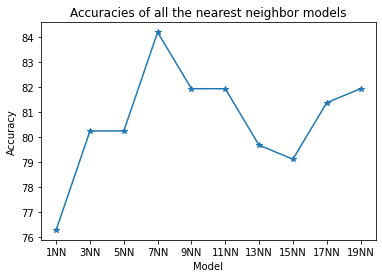

In [149]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN', '9NN', '11NN', '13NN', '15NN', '17NN', '19NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy, nn9_accuracy, 
          nn11_accuracy, nn13_accuracy, nn15_accuracy, nn17_accuracy, nn19_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

##### 5.2.12 Applying Gaussian Naive Bayes Classification 

In [150]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [151]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]

In [152]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Gaussian Naive Bayes'] = naive_bayes_accuracy
print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))

[[89 22]
 [21 45]]
The accuracy of this model is 75.71 %.


##### 5.2.13 Applying Decision Tree Classification

In [153]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [154]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [155]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Decision Tree'] = decision_tree_accuracy
print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))

[[99 12]
 [18 48]]
The accuracy of this model is 83.05 %.


##### 5.2.14 Applying Random Forest Classification (10 trees)

In [156]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [157]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [158]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (10 trees)'] = random_forest_10_accuracy
print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))

[[97 14]
 [18 48]]
The accuracy of this model is 81.92 %.


##### 5.2.15 Applying Random Forest Classification (25 trees)

In [159]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [160]:
### Predicting the Test set results

Y_pred = random_forest_25_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [161]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (25 trees)'] = random_forest_25_accuracy
print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))

[[96 15]
 [17 49]]
The accuracy of this model is 81.92 %.


##### 5.2.16 Applying Random Forest Classification (50 trees)

In [162]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [163]:
### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [164]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (50 trees)'] = random_forest_50_accuracy
print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))

[[96 15]
 [18 48]]
The accuracy of this model is 81.36 %.


##### 5.2.17 Applying Random Forest Classification (100 trees)

In [165]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [166]:
### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [167]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (100 trees)'] = random_forest_100_accuracy
print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))

[[95 16]
 [18 48]]
The accuracy of this model is 80.79 %.


##### 5.2.18 Applying Stacking Algorithm

In [168]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('kernel_svc', kernel_svm_classifier))
base_models.append(('7nn', classifier_7nn))
base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('random_forest_25', random_forest_25_classifier))

### Define the meta models

meta_model = logistic_classifier

In [169]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('kernel_svc', SVC(random_state=27)),
                               ('7nn', KNeighborsClassifier(n_neighbors=7)),
                               ('decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=27)),
                               ('random_forest_25',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=25,
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [170]:
### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [171]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy of the model

stacking_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Stacking Classifier'] = stacking_accuracy
print('The accuracy of this model is {} %.'.format(stacking_accuracy))

[[105   6]
 [ 18  48]]
The accuracy of this model is 86.44 %.


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 Training accuracy of the models

Now we will tabulate all the models along with their accuracies. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [172]:
### Looking at the model performance dictionary

model_performance

OrderedDict([('Logistic Regression', 83.62),
             ('Linear SVC', 81.36),
             ('Kernel SVC', 83.62),
             ('1 Nearest Neighbors', 76.27),
             ('3 Nearest Neighbors', 80.23),
             ('5 Nearest Neighbors', 80.23),
             ('7 Nearest Neighbors', 84.18),
             ('9 Nearest Neighbors', 81.92),
             ('11 Nearest Neighbors', 81.92),
             ('13 Nearest Neighbors', 79.66),
             ('15 Nearest Neighbors', 79.1),
             ('17 Nearest Neighbors', 81.36),
             ('19 Nearest Neighbors', 81.92),
             ('Gaussian Naive Bayes', 75.71),
             ('Decision Tree', 83.05),
             ('Random Forest (10 trees)', 81.92),
             ('Random Forest (25 trees)', 81.92),
             ('Random Forest (50 trees)', 81.36),
             ('Random Forest (100 trees)', 80.79),
             ('Stacking Classifier', 86.44)])

In [173]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy'])
count = 1

for model in model_performance:
    row = [count, model, model_performance[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │
╞═════════╪═══════════════════════════╪══════════════════╡
│       1 │ Logistic Regression       │            83.62 │
├─────────┼───────────────────────────┼──────────────────┤
│       2 │ Linear SVC                │            81.36 │
├─────────┼───────────────────────────┼──────────────────┤
│       3 │ Kernel SVC                │            83.62 │
├─────────┼───────────────────────────┼──────────────────┤
│       4 │ 1 Nearest Neighbors       │            76.27 │
├─────────┼───────────────────────────┼──────────────────┤
│       5 │ 3 Nearest Neighbors       │            80.23 │
├─────────┼───────────────────────────┼──────────────────┤
│       6 │ 5 Nearest Neighbors       │            80.23 │
├─────────┼───────────────────────────┼──────────────────┤
│       7 │ 7 Nearest Neighbors       │            84.18 │
├─────────┼───────────────────────────┼─────────────────

From the above table, we can see that the model Stacking Classifier has the highest accuracy of 86.44 percent.

##### 5.3.2 Applying K-fold Cross Validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before. This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. 

In [174]:
### Create a list of classifiers

classifiers = []
classifiers.append(logistic_classifier)
classifiers.append(linear_svm_classifier)
classifiers.append(kernel_svm_classifier)
classifiers.append(classifier_1nn)
classifiers.append(classifier_3nn)
classifiers.append(classifier_5nn)
classifiers.append(classifier_7nn)
classifiers.append(classifier_9nn)
classifiers.append(classifier_11nn)
classifiers.append(classifier_13nn)
classifiers.append(classifier_15nn)
classifiers.append(classifier_17nn)
classifiers.append(classifier_19nn)
classifiers.append(naive_bayes_classifier)
classifiers.append(decision_tree_classifier)
classifiers.append(random_forest_10_classifier)
classifiers.append(random_forest_25_classifier)
classifiers.append(random_forest_50_classifier)
classifiers.append(random_forest_100_classifier)
classifiers.append(stacking_classifier)

We will now use this list of classifiers to perform K-fold cross validation.

In [175]:
### Applying K-fold cross validation and tabulating the results

validation_accuracies = []
standard_deviations = []

for each_classifier in classifiers:
    accuracy = cross_val_score(estimator = each_classifier, X = X_train, y = Y_train, cv = 20)
    validation_accuracies.append(np.mean(accuracy) * 100)
    standard_deviations.append(accuracy.std() * 100)
    
validation_accuracies

[79.94444444444446,
 78.10317460317461,
 80.65873015873017,
 76.12698412698413,
 76.29761904761907,
 76.26984126984128,
 78.10714285714286,
 79.40079365079366,
 78.96825396825398,
 79.2420634920635,
 80.0952380952381,
 79.52380952380953,
 79.23809523809524,
 74.98015873015873,
 80.23809523809524,
 79.67063492063492,
 78.6825396825397,
 79.38492063492065,
 78.96428571428572,
 80.234126984127]

In [176]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Validation Accuracy', 'Standard Deviation'])
count = 1

for model in model_performance:
    row = [count, model, model_performance[model], validation_accuracies[count - 1], standard_deviations[count - 1]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════╤═══════════════════════╤══════════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │   Validation Accuracy │   Standard Deviation │
╞═════════╪═══════════════════════════╪══════════════════╪═══════════════════════╪══════════════════════╡
│       1 │ Logistic Regression       │            83.62 │               79.9444 │              6.77078 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       2 │ Linear SVC                │            81.36 │               78.1032 │              6.04556 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       3 │ Kernel SVC                │            83.62 │               80.6587 │              5.52578 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       4 │ 1 Nearest Neighbors       │       

From the above table, we can see that the validation accuracy is higher in Kernel Support Vector Classification. However, we will use the model - Stacking Classifier for our solution as its validation accurcy is similar to Kernel SVC but has a higher model accuracy than Kernel SVC.

### 6. Preparing Data For Submission

In this section, we will predict the results using the Kernel Support Vector Classification model on the given test data. The predicted results will be stored in an excel sheet which will be later uploaded to the Kaggle's competition page to find out the accuracy.

#### 6.1 Predicting the results using Stacking Classifier

In [177]:
### Predicting the Test set results

final_predictions = stacking_classifier.predict(real_test_data)
print(len(final_predictions))

418


#### 6.2 Creating the excel sheet for submission

In [178]:
### Creating a result dataframe using PassengerId and generated predictions

passengerId = list(range(892, 1310))
result = pd.DataFrame(passengerId, columns = ['PassengerId'])
result['Survived'] = final_predictions
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [179]:
### Creating a CSV file of the predictions

compression_opts = dict(method = 'zip', archive_name = 'stacking_classifier.csv')  
result.to_csv('stacking_classifier.zip', index = False, compression = compression_opts)

### 7. Conclusion

The above predictions resulted in an accuracy of 78.468 percent. 